In [1]:

import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-playstore-apps/Google-Playstore.csv


# Exploring the data

In [2]:
data=pd.read_csv("/kaggle/input/google-playstore-apps/Google-Playstore.csv")
data.columns


Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [3]:
print(data.shape)
data.head()


(2312944, 24)


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


### It's clear that some columns are irrelavant, so we're going to remove them

In [4]:
data=data.drop(columns=["Developer Website","App Id"   ,"Developer Email" ,"Privacy Policy","Installs"])
data.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Minimum Installs',
       'Maximum Installs', 'Free', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Released', 'Last Updated',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

# Cleaning the data

In [5]:
#Starting with NaN Values
print(data.isnull().sum())

App Name                5
Category                0
Rating              22883
Rating Count        22883
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Currency              135
Size                  196
Minimum Android      6530
Developer Id           33
Released            71053
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Scraped Time            0
dtype: int64


### Since Our dataset is large enough, we can simply drop rows with NaN values

In [6]:
for c in data.columns.tolist() :
    data = data.drop(data[data[c].isnull()].index)

print(data.shape)
print(data.isnull().sum())

(2235275, 19)
App Name            0
Category            0
Rating              0
Rating Count        0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Currency            0
Size                0
Minimum Android     0
Developer Id        0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
Scraped Time        0
dtype: int64


In [7]:
print("Number of rows dropped = ",2312944- data.shape[0])
print("in percentage, only ", ((2312944- data.shape[0])/2312944)*100,"% of the data")

Number of rows dropped =  77669
in percentage, only  3.358014720633098 % of the data


### Checking for Duplicates

In [8]:

duplicate_rows = data[data.duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [App Name, Category, Rating, Rating Count, Minimum Installs, Maximum Installs, Free, Price, Currency, Size, Minimum Android, Developer Id, Released, Last Updated, Content Rating, Ad Supported, In App Purchases, Editors Choice, Scraped Time]
Index: []


### Empty DataFrame : meaning we have no duplicates, we can go on with the cleaning and exploration now

In [9]:
#Categories
print(data["Category"].unique())


['Adventure' 'Tools' 'Productivity' 'Communication' 'Social'
 'Libraries & Demo' 'Lifestyle' 'Personalization' 'Racing'
 'Maps & Navigation' 'Travel & Local' 'Food & Drink' 'Books & Reference'
 'Medical' 'Puzzle' 'Entertainment' 'Arcade' 'Auto & Vehicles'
 'Photography' 'Health & Fitness' 'Education' 'Shopping' 'Board'
 'Music & Audio' 'Sports' 'Beauty' 'Business' 'Educational' 'Finance'
 'News & Magazines' 'Casual' 'Art & Design' 'House & Home' 'Card' 'Events'
 'Trivia' 'Weather' 'Strategy' 'Word' 'Video Players & Editors' 'Action'
 'Simulation' 'Music' 'Dating' 'Role Playing' 'Casino' 'Comics'
 'Parenting']


In [10]:
#Rating
print(data["Rating"].describe())

count    2.235275e+06
mean     2.206447e+00
std      2.108360e+00
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      4.300000e+00
max      5.000000e+00
Name: Rating, dtype: float64


#### Apps are rated between 0 and 5 stars with 2.2 as an average which lays around the middle , balanced is data good (: 

In [11]:
data.rename(columns={"Minimum Installs": "Installs Category"}, inplace=True)
data.rename(columns={"Maximum Installs": "Installs"}, inplace=True)
data.dtypes

App Name              object
Category              object
Rating               float64
Rating Count         float64
Installs Category    float64
Installs               int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Released              object
Last Updated          object
Content Rating        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

In [12]:
data["Currency"].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'SGD', 'AUD', 'ZAR'], dtype=object)

In [13]:
data["Currency"][data['Price']>0].unique()

array(['USD'], dtype=object)

#### All paid apps are in USD


### Currency can help us locate the targeted region of the developer

In [14]:
currency_to_region = {
    'USD': 'North America',
    'XXX': 'Unknown',
    'CAD': 'North America',
    'EUR': 'Europe',
    'INR': 'Asia',
    'VND': 'Asia',
    'GBP': 'Europe',
    'BRL': 'South America',
    'KRW': 'Asia',
    'TRY': 'Europe',
    'SGD': 'Asia',
    'AUD': 'Oceania',
    'ZAR': 'Africa'
}


data['Region'] = data['Currency'].map(currency_to_region)
print(data.loc[:,["Currency","Region"]])


        Currency         Region
0            USD  North America
1            USD  North America
2            USD  North America
3            USD  North America
4            USD  North America
...          ...            ...
2312938      USD  North America
2312940      USD  North America
2312941      USD  North America
2312942      USD  North America
2312943      USD  North America

[2235275 rows x 2 columns]


In [15]:
data=data.drop(columns="Currency")
data.dtypes

App Name              object
Category              object
Rating               float64
Rating Count         float64
Installs Category    float64
Installs               int64
Free                    bool
Price                float64
Size                  object
Minimum Android       object
Developer Id          object
Released              object
Last Updated          object
Content Rating        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
Region                object
dtype: object

### Exploring Size

In [16]:
print(data["Size"].head(3))
print(data["Size"].str[-1].unique())

0     10M
1    2.9M
2    3.7M
Name: Size, dtype: object
['M' 'e' 'k' 'G']


In [17]:
print(data[["Size","Installs","Category","Rating"]][data["Size"].str[-1]=='e'])

                       Size  Installs        Category  Rating
137      Varies with device    152470  Travel & Local     4.8
140      Varies with device     84421         Weather     4.2
154      Varies with device      4820       Adventure     3.5
180      Varies with device      2340        Shopping     4.3
182      Varies with device     12927       Education     4.4
...                     ...       ...             ...     ...
2312677  Varies with device  24015387    Role Playing     3.9
2312714  Varies with device      1219       Lifestyle     4.0
2312738  Varies with device        19        Business     0.0
2312745  Varies with device     14514         Weather     4.9
2312755  Varies with device     22102          Arcade     3.7

[51129 rows x 4 columns]


### converting all to megabytes, and replacing "varies with device" with the average values

In [18]:
data_copy=data.copy()

In [19]:
k=data["Size"][data["Size"].str[-1]=="k"].index
G=data["Size"][data["Size"].str[-1]=="G"].index
data_copy['Size'] = data_copy['Size'].str[:-1]
print(data_copy["Size"].head())

0     10
1    2.9
2    3.7
3    1.8
4    6.2
Name: Size, dtype: object


In [20]:
index_nan=data_copy["Size"][data_copy["Size"]=="Varies with devic"].index
data_copy.loc[index_nan,"Size"]=0
print(data_copy.loc[index_nan,"Size"])

137        0
140        0
154        0
180        0
182        0
          ..
2312677    0
2312714    0
2312738    0
2312745    0
2312755    0
Name: Size, Length: 51129, dtype: object


In [21]:
data_copy["Size"] = data_copy["Size"].replace(",", "", regex=True)
data_copy['Size'] =data_copy['Size'].astype(float)
data_copy.loc[k,"Size"]=data_copy.loc[k,"Size"]/1024
data_copy.loc[G,"Size"]=data_copy.loc[G,"Size"]*1024
print(data_copy["Size"])



0          10.0
1           2.9
2           3.7
3           1.8
4           6.2
           ... 
2312938    10.0
2312940    44.0
2312941    29.0
2312942    10.0
2312943     5.2
Name: Size, Length: 2235275, dtype: float64


In [22]:
filtered_data = data_copy[~data_copy['Size'].isin([0])]
mean_value = filtered_data['Size'].mean()
data.loc[data_copy['Size'].isin([0]), 'Size'] = mean_value

In [23]:
data=data_copy

#### Removing useless variables

In [24]:
%who

G	 c	 currency_to_region	 data	 data_copy	 dirname	 duplicate_rows	 filename	 filenames	 
filtered_data	 index_nan	 k	 mean_value	 np	 os	 pd	 


In [25]:
import gc
del G
del c
del k
del mean_value
del data_copy
del filtered_data
del index_nan
del currency_to_region
gc.collect()

28

In [26]:
data_copy=data.copy()


### Converting dates to a uniform format and type

In [27]:
data_copy["Scraped Time"]

0          2021-06-15 20:19:35
1          2021-06-15 20:19:35
2          2021-06-15 20:19:35
3          2021-06-15 20:19:35
4          2021-06-15 20:19:35
                  ...         
2312938    2021-06-16 12:59:18
2312940    2021-06-16 12:59:19
2312941    2021-06-16 12:59:19
2312942    2021-06-16 12:59:19
2312943    2021-06-16 12:59:19
Name: Scraped Time, Length: 2235275, dtype: object

In [28]:
data_copy["Scraped Time"]=data_copy["Scraped Time"].str[:-9]
data_copy["Scraped Time"]

0          2021-06-15
1          2021-06-15
2          2021-06-15
3          2021-06-15
4          2021-06-15
              ...    
2312938    2021-06-16
2312940    2021-06-16
2312941    2021-06-16
2312942    2021-06-16
2312943    2021-06-16
Name: Scraped Time, Length: 2235275, dtype: object

In [29]:
data_copy['Released'] = pd.to_datetime(data_copy['Released'], format='%b %d, %Y')
data_copy['Released'] = data_copy['Released'].dt.strftime('%d/%m/%Y')
print(data_copy['Released'])

0          26/02/2020
1          21/05/2020
2          09/08/2019
3          10/09/2018
4          21/02/2020
              ...    
2312938    22/05/2018
2312940    17/01/2018
2312941    19/08/2018
2312942    01/08/2016
2312943    09/08/2019
Name: Released, Length: 2235275, dtype: object


In [30]:
data_copy['Last Updated'] = pd.to_datetime(data_copy['Last Updated'], format='%b %d, %Y')
data_copy['Last Updated'] = data_copy['Last Updated'].dt.strftime('%d/%m/%Y')
print(data_copy['Last Updated'])

0          26/02/2020
1          06/05/2021
2          19/08/2019
3          13/10/2018
4          12/11/2018
              ...    
2312938    14/12/2018
2312940    02/02/2018
2312941    19/08/2018
2312942    05/05/2021
2312943    19/08/2019
Name: Last Updated, Length: 2235275, dtype: object


In [31]:
data_copy['Released'] = pd.to_datetime(data_copy['Released'], errors='coerce')
data_copy['Last Updated'] = pd.to_datetime(data_copy['Last Updated'], errors='coerce')
data_copy['Scraped Time'] = pd.to_datetime(data_copy['Scraped Time'], errors='coerce')

print(data_copy.dtypes)


<ipython-input-31-6ef267da9e39>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_copy['Released'] = pd.to_datetime(data_copy['Released'], errors='coerce')
<ipython-input-31-6ef267da9e39>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_copy['Last Updated'] = pd.to_datetime(data_copy['Last Updated'], errors='coerce')


App Name                     object
Category                     object
Rating                      float64
Rating Count                float64
Installs Category           float64
Installs                      int64
Free                           bool
Price                       float64
Size                        float64
Minimum Android              object
Developer Id                 object
Released             datetime64[ns]
Last Updated         datetime64[ns]
Content Rating               object
Ad Supported                   bool
In App Purchases               bool
Editors Choice                 bool
Scraped Time         datetime64[ns]
Region                       object
dtype: object


In [32]:
print(data_copy[["Released","Scraped Time","Last Updated"]])

          Released Scraped Time Last Updated
0       2020-02-26   2021-06-15   2020-02-26
1       2020-05-21   2021-06-15   2021-05-06
2       2019-08-09   2021-06-15   2019-08-19
3       2018-09-10   2021-06-15   2018-10-13
4       2020-02-21   2021-06-15   2018-11-12
...            ...          ...          ...
2312938 2018-05-22   2021-06-16   2018-12-14
2312940 2018-01-17   2021-06-16   2018-02-02
2312941 2018-08-19   2021-06-16   2018-08-19
2312942 2016-08-01   2021-06-16   2021-05-05
2312943 2019-08-09   2021-06-16   2019-08-19

[2235275 rows x 3 columns]


In [33]:
data=data_copy

In [34]:
del data_copy
gc.collect()

23

### All SET :D, now we can try to add new features

In [35]:
#ADDING THE YEAR OF RELEASE
data['Year'] = data['Released'].dt.year

In [36]:
#ADDING THE AGE OF THE APP IN YEARS
data['Age'] = (data['Scraped Time'] - data['Released']).dt.days / 365.25
print(data["Age"].head())

0    1.300479
1    1.067762
2    1.850787
3    2.762491
4    1.314168
Name: Age, dtype: float64


In [37]:
#ADDING DAYS SINCE UPDATE 
data['Days Since Update'] = (data['Scraped Time'] - data['Last Updated']).dt.days / 365.25
print(data["Days Since Update"].head())

0    1.300479
1    0.109514
2    1.823409
3    2.672142
4    2.590007
Name: Days Since Update, dtype: float64


In [38]:
data_copy=data.copy()

**Rating Confidence =**
\begin{cases} 
\frac{\text{Average Rating} \times \log(\text{Number of Ratings})}{\text{Max Rating} \times \log(\text{Max Rating})} & \text{if Number of Ratings} > 0 \\
\text{0} & \text{if Number of Ratings} = 0
\end{cases}



In [39]:
import math
max_rating = 5
default_confidence = 0

data_copy['Rating Confidence'] = np.where(
    data_copy['Rating Count'] > 0, 
    (data_copy['Rating'] * np.log(data_copy['Rating Count'])) / (max_rating * np.log(max_rating)), 
    default_confidence
)
print(data_copy['Rating Confidence'])

0          0.000000
1          2.273972
2          0.000000
3          1.000000
4          0.000000
             ...   
2312938    1.197055
2312940    0.000000
2312941    0.000000
2312942    0.904421
2312943    1.543959
Name: Rating Confidence, Length: 2235275, dtype: float64


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
#ADDING SEASON
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'
data_copy['Season'] = data_copy['Released'].dt.month.apply(get_season)

print(data_copy["Season"])


0          Winter
1          Spring
2          Summer
3          Autumn
4          Winter
            ...  
2312938    Spring
2312940    Winter
2312941    Summer
2312942    Summer
2312943    Summer
Name: Season, Length: 2235275, dtype: object


In [41]:
data_copy.dtypes

App Name                     object
Category                     object
Rating                      float64
Rating Count                float64
Installs Category           float64
Installs                      int64
Free                           bool
Price                       float64
Size                        float64
Minimum Android              object
Developer Id                 object
Released             datetime64[ns]
Last Updated         datetime64[ns]
Content Rating               object
Ad Supported                   bool
In App Purchases               bool
Editors Choice                 bool
Scraped Time         datetime64[ns]
Region                       object
Year                          int32
Age                         float64
Days Since Update           float64
Rating Confidence           float64
Season                       object
dtype: object

In [42]:
data_copy["Installs"].describe()

count    2.235275e+06
mean     3.081201e+05
std      2.208882e+07
min      0.000000e+00
25%      8.600000e+01
50%      7.060000e+02
75%      7.427000e+03
max      1.205763e+10
Name: Installs, dtype: float64

$$
\text{Monetization Score} = 
\begin{cases} 
\frac{\text{installs} \times \text{price}}{\text{log(Max Revenue)}} & \text{if app is paid} \\
\frac{\text{installs} \times \left( \text{ad\_supported} \times \text{ad\_revenue\_per\_install} + \text{in\_app\_purchases} \times \text{iap\_revenue\_per\_install} \right)}{\text{log(Max Revenue)}} & \text{if app is free}
\end{cases}
$$


In [43]:
import numpy as np

ad_revenue_per_install = 0.05
iap_revenue_per_install = 0.10
max_revenue = 600000000


revenue = np.where(
    data_copy['Free'], 
    data_copy['Installs'] * (
        (data_copy['Ad Supported'] * ad_revenue_per_install) + 
        (data_copy['In App Purchases'] * iap_revenue_per_install)
    ),
    data_copy['Installs'] * data_copy['Price']
)


monetization_score = revenue / np.log(max_revenue)

data_copy['Monetization Score'] = monetization_score

print(data_copy['Monetization Score'])


0           0.000000
1          18.953674
2           0.000000
3           0.047001
4           0.000000
             ...    
2312938     4.897974
2312940     0.000000
2312941     0.000000
2312942     6.518263
2312943     0.875698
Name: Monetization Score, Length: 2235275, dtype: float64


In [44]:
data=data_copy
del data_copy
gc.collect()

70

In [45]:
data.dtypes

App Name                      object
Category                      object
Rating                       float64
Rating Count                 float64
Installs Category            float64
Installs                       int64
Free                            bool
Price                        float64
Size                         float64
Minimum Android               object
Developer Id                  object
Released              datetime64[ns]
Last Updated          datetime64[ns]
Content Rating                object
Ad Supported                    bool
In App Purchases                bool
Editors Choice                  bool
Scraped Time          datetime64[ns]
Region                        object
Year                           int32
Age                          float64
Days Since Update            float64
Rating Confidence            float64
Season                        object
Monetization Score           float64
dtype: object

In [46]:
# Convert boolean columns to 1/0
data['Free'] = data['Free'].astype(int)
data['Ad Supported'] = data['Ad Supported'].astype(int)
data['In App Purchases'] = data['In App Purchases'].astype(int)
data['Editors Choice'] = data['Editors Choice'].astype(int)


In [47]:
print(data.dtypes)
print(data.shape)

App Name                      object
Category                      object
Rating                       float64
Rating Count                 float64
Installs Category            float64
Installs                       int64
Free                           int64
Price                        float64
Size                         float64
Minimum Android               object
Developer Id                  object
Released              datetime64[ns]
Last Updated          datetime64[ns]
Content Rating                object
Ad Supported                   int64
In App Purchases               int64
Editors Choice                 int64
Scraped Time          datetime64[ns]
Region                        object
Year                           int32
Age                          float64
Days Since Update            float64
Rating Confidence            float64
Season                        object
Monetization Score           float64
dtype: object
(2235275, 25)


# Visualizing Our Data

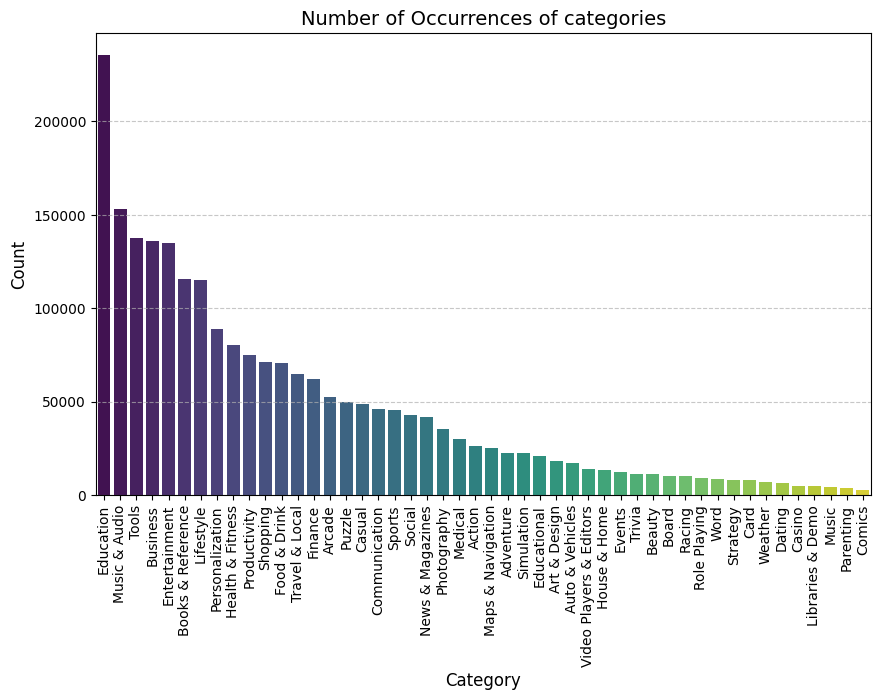

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

value_counts = data['Category'].value_counts()
sorted_counts = value_counts.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=sorted_counts.index,
    y=sorted_counts.values,
    palette="viridis"
)
plt.title("Number of Occurrences of categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


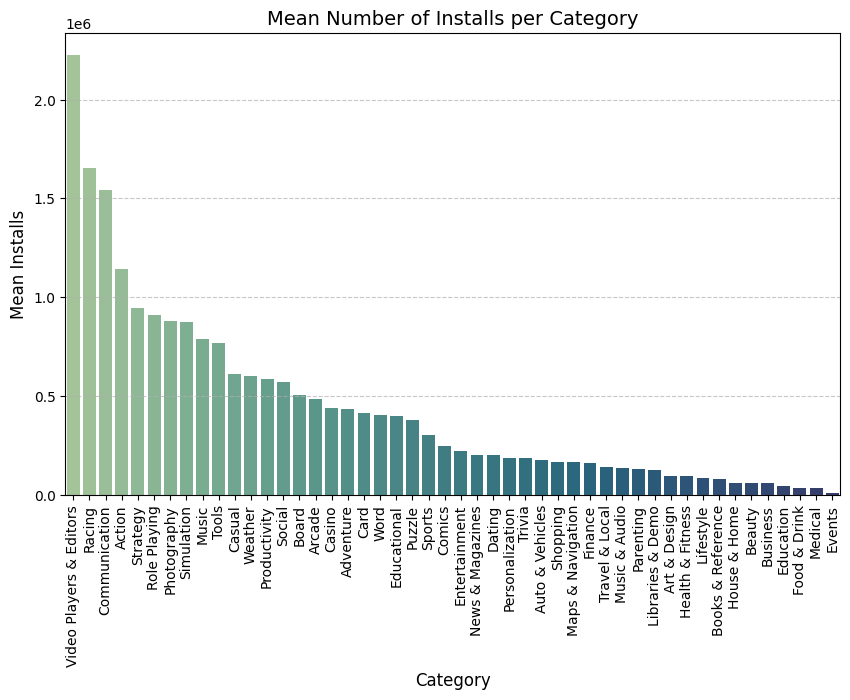

In [49]:
mean_installs_per_category = data.groupby('Category')['Installs'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=mean_installs_per_category.index,
    y=mean_installs_per_category.values,
    palette="crest"
)
plt.title("Mean Number of Installs per Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Mean Installs", fontsize=12)
plt.xticks(rotation=90, fontsize=10) 
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


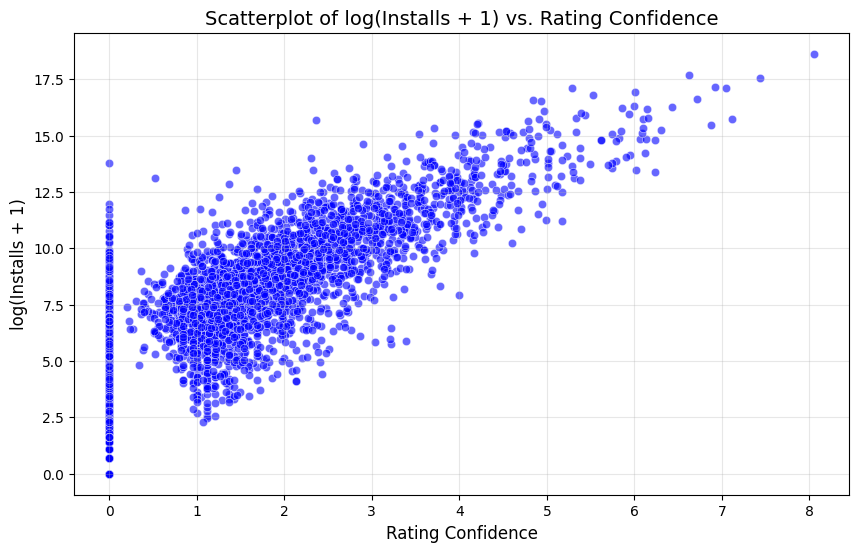

In [50]:
sample_size = 5000
sampled_data = data.sample(n=sample_size, random_state=42)

sampled_data['log_installs'] = np.log(sampled_data['Installs'] + 1)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sampled_data,
    x='Rating Confidence',
    y='log_installs',
    alpha=0.6,
    color='blue'
)
plt.title("Scatterplot of log(Installs + 1) vs. Rating Confidence", fontsize=14)
plt.xlabel("Rating Confidence", fontsize=12)
plt.ylabel("log(Installs + 1)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


**Linear tendency**

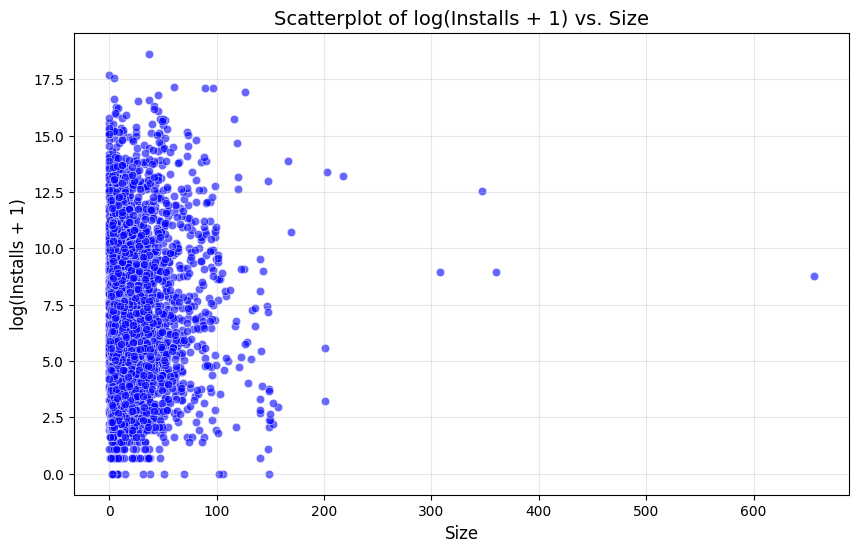

In [51]:
sample_size = 5000
sampled_data = data.sample(n=sample_size, random_state=42)

sampled_data['log_installs'] = np.log(sampled_data['Installs'] + 1)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sampled_data,
    x='Size',
    y='log_installs',
    alpha=0.6,
    color='blue'
)
plt.title("Scatterplot of log(Installs + 1) vs. Size", fontsize=14)
plt.xlabel("Size", fontsize=12)
plt.ylabel("log(Installs + 1)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


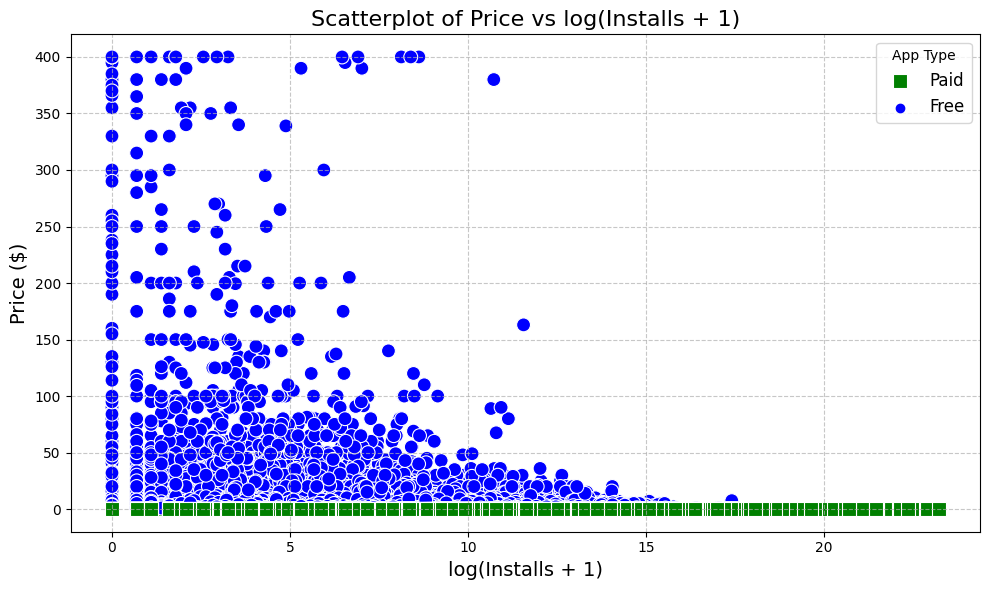

In [52]:

data['log_Installs'] = np.log1p(data['Installs'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='log_Installs',
    y='Price',
    hue='Free',  
    palette={0: 'blue', 1: 'green'},
    style='Free',
    markers={0: 'o', 1: 's'},
    s=100  
)


plt.title('Scatterplot of Price vs log(Installs + 1)', fontsize=16)
plt.xlabel('log(Installs + 1)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='App Type', labels=['Paid', 'Free'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


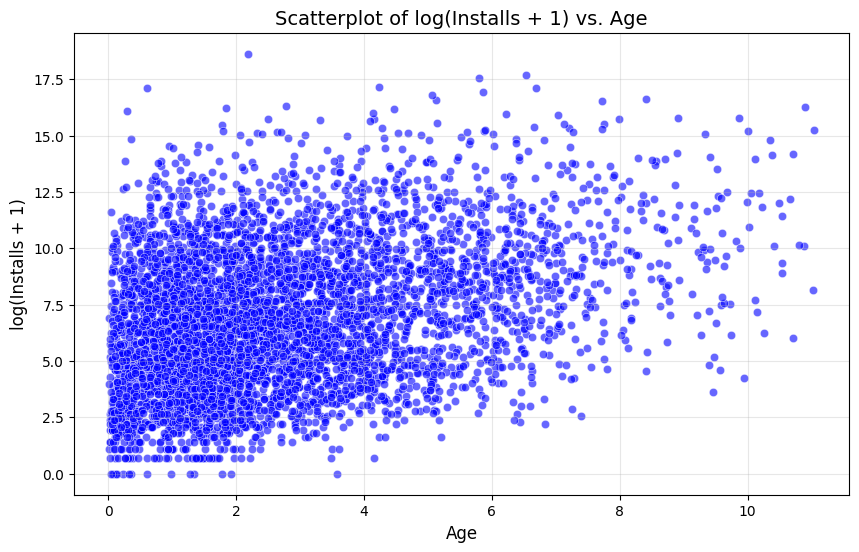

In [53]:
sample_size = 5000
sampled_data = data.sample(n=sample_size, random_state=42)

sampled_data['log_installs'] = np.log(sampled_data['Installs'] + 1)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sampled_data,
    x='Age',
    y='log_installs',
    alpha=0.6,
    color='blue'
)
plt.title("Scatterplot of log(Installs + 1) vs. Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("log(Installs + 1)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


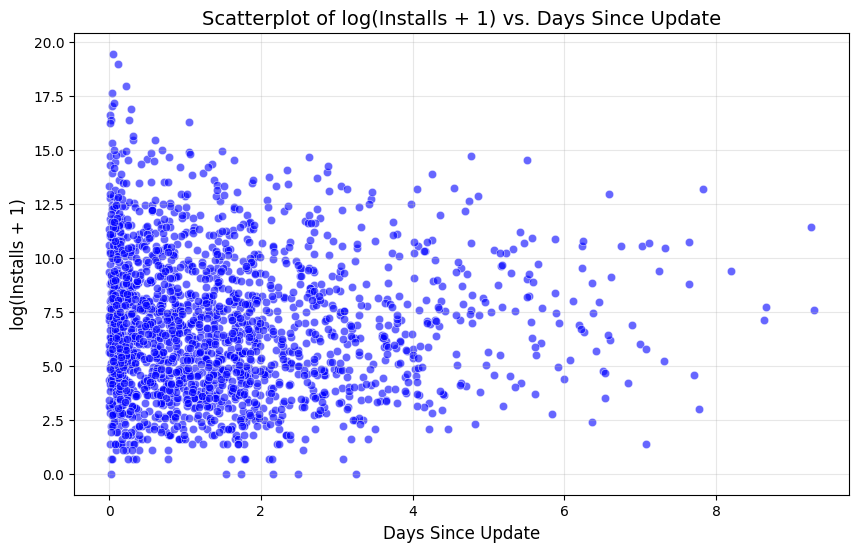

In [54]:
sample_size = 2000
sampled_data = data.sample(n=sample_size, random_state=70)

sampled_data['log_installs'] = np.log(sampled_data['Installs'] + 1)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sampled_data,
    x='Days Since Update',
    y='log_installs',
    alpha=0.6,
    color='blue'
)
plt.title("Scatterplot of log(Installs + 1) vs. Days Since Update", fontsize=14)
plt.xlabel("Days Since Update", fontsize=12)
plt.ylabel("log(Installs + 1)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


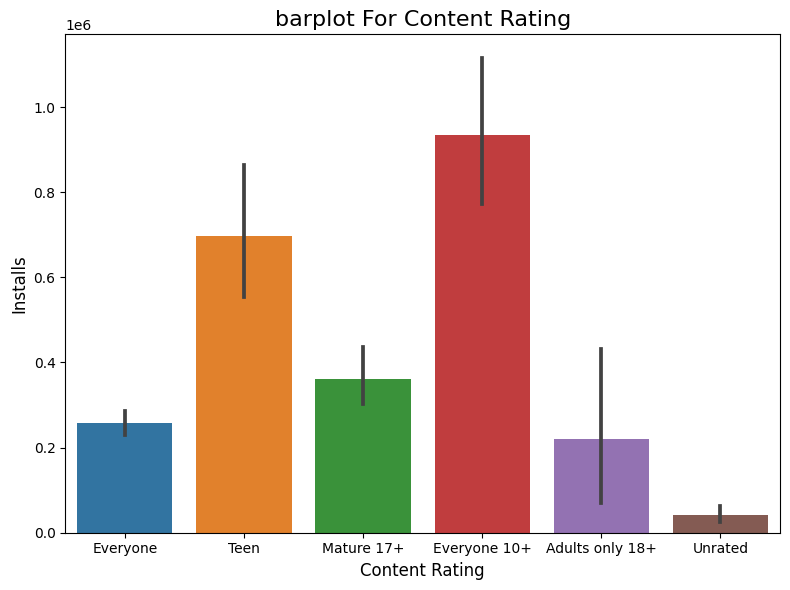

In [55]:

plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Content Rating', y='Installs')

plt.title('barplot For Content Rating', fontsize=16)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Installs', fontsize=12)

plt.tight_layout()
plt.show()

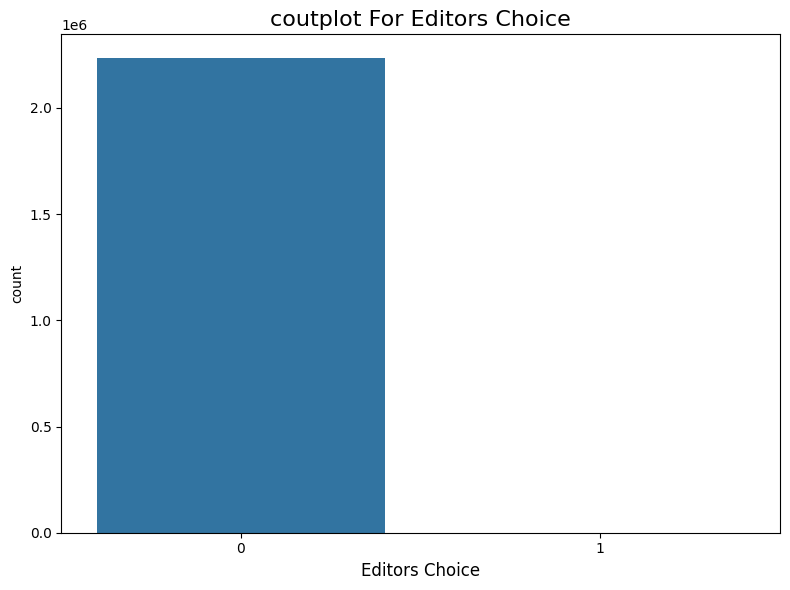

In [56]:

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Editors Choice')

plt.title('coutplot For Editors Choice', fontsize=16)
plt.xlabel('Editors Choice', fontsize=12)


plt.tight_layout()
plt.show()

In [57]:
len(data["Editors Choice"][data["Editors Choice"]==1].index)

784

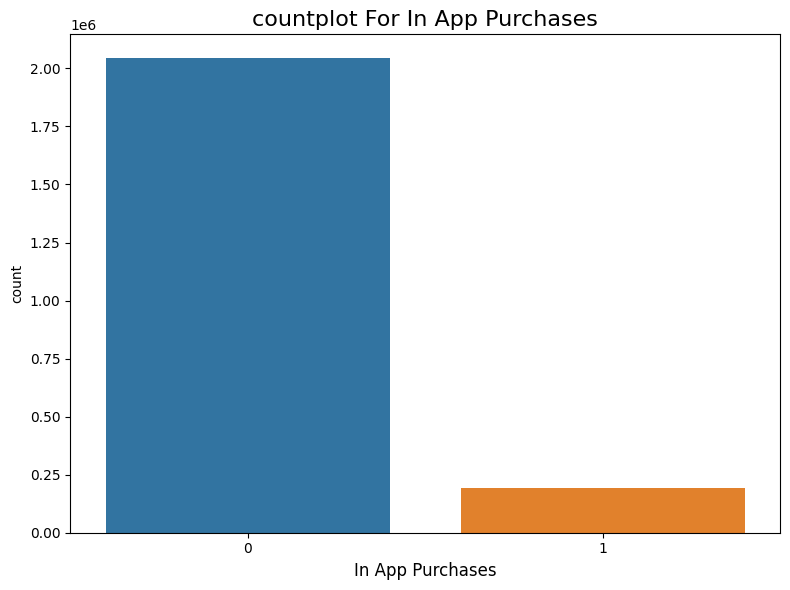

In [58]:

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='In App Purchases')

plt.title('countplot For In App Purchases', fontsize=16)
plt.xlabel('In App Purchases', fontsize=12)


plt.tight_layout()
plt.show()

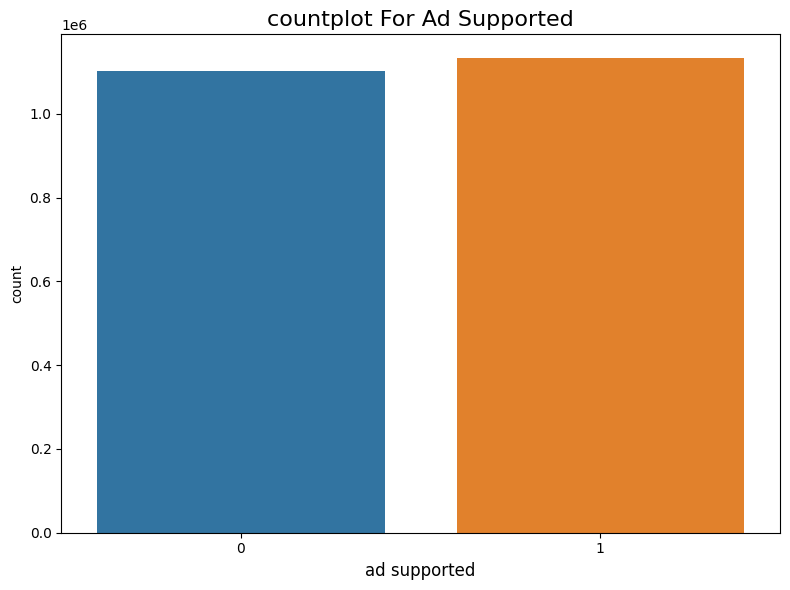

In [59]:

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Ad Supported')

plt.title('countplot For Ad Supported', fontsize=16)
plt.xlabel('ad supported', fontsize=12)


plt.tight_layout()
plt.show()

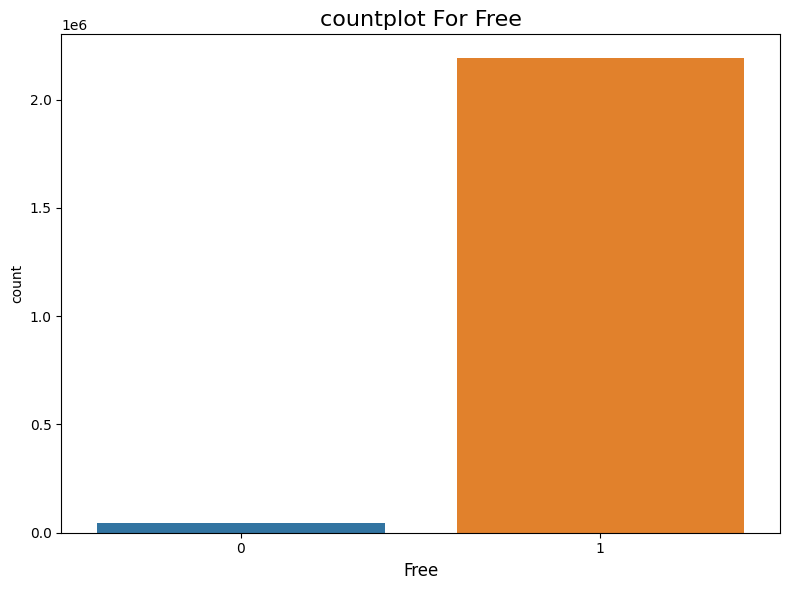

In [60]:

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Free')

plt.title('countplot For Free', fontsize=16)
plt.xlabel('Free', fontsize=12)


plt.tight_layout()
plt.show()

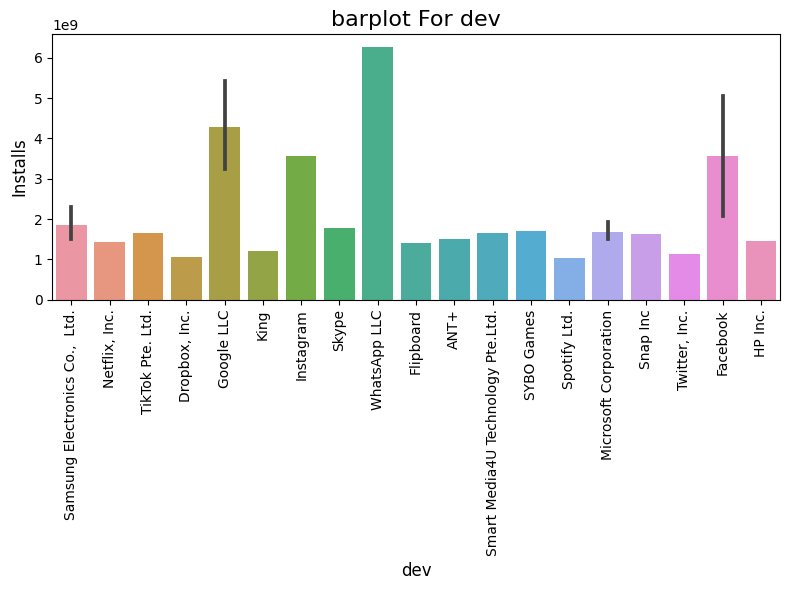

In [61]:
dev_df=data[["Developer Id","Installs"]][data["Installs"]>1000000000]
len(dev_df["Developer Id"].unique())
plt.figure(figsize=(8, 6))
sns.barplot(data=dev_df, x='Developer Id', y='Installs')

plt.title('barplot For dev', fontsize=16)
plt.xlabel('dev', fontsize=12)
plt.ylabel('Installs', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

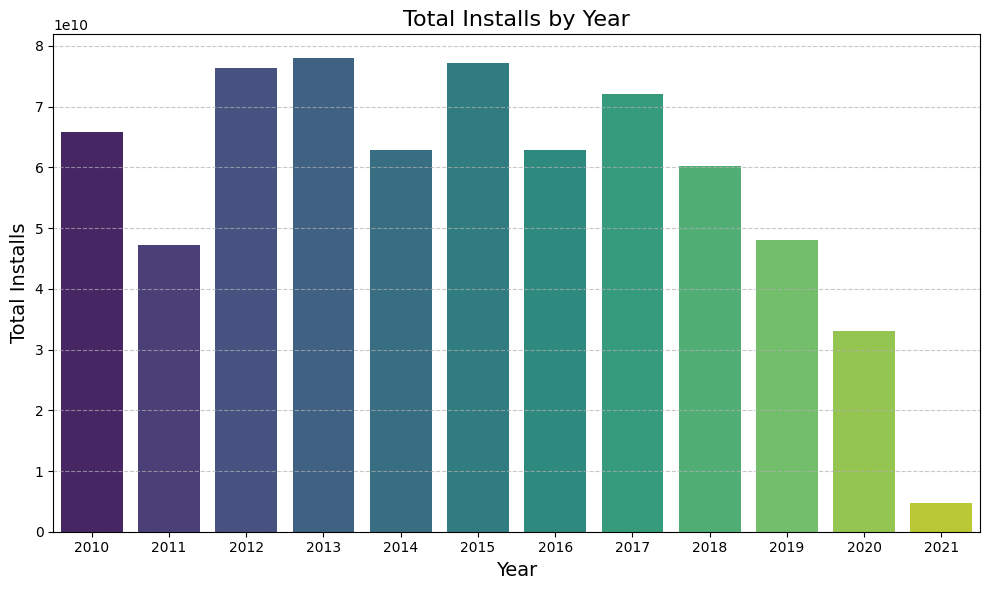

In [62]:

df_yearly = data.groupby('Year')['Installs'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_yearly,
    x='Year',
    y='Installs',
    palette='viridis'
)

plt.title('Total Installs by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Installs', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


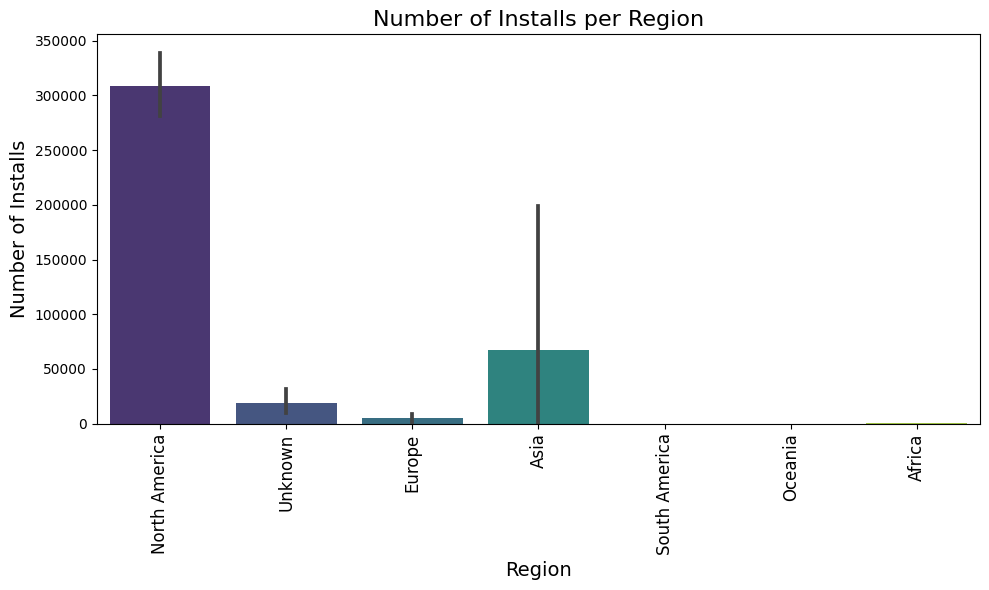

In [63]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Installs', data=data, palette='viridis')
plt.title('Number of Installs per Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Installs', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()


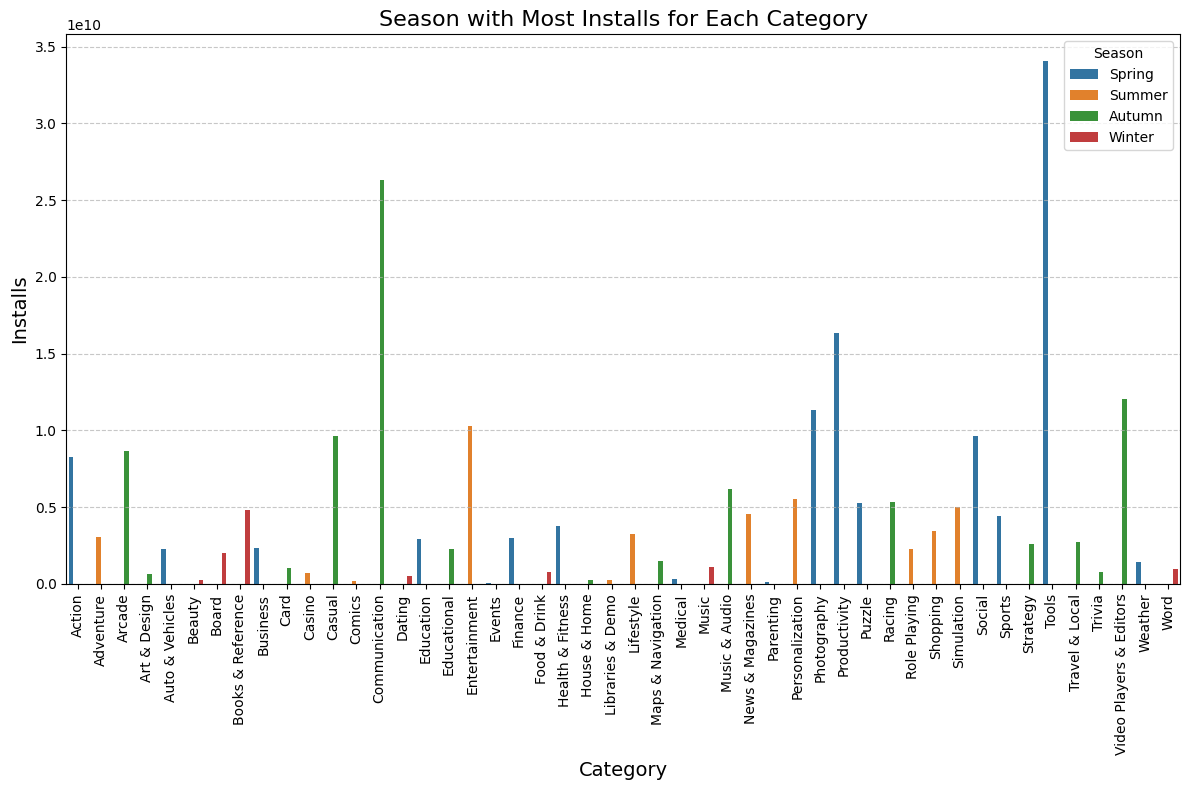

In [64]:

data_season_max = data.groupby(['Category', 'Season'])['Installs'].sum().reset_index()
data_season_max = data_season_max.loc[data_season_max.groupby('Category')['Installs'].idxmax()]

plt.figure(figsize=(12, 8))
sns.barplot(
    data=data_season_max,
    x='Category',
    y='Installs',
    hue='Season',
    palette='tab10'
)

plt.title('Season with Most Installs for Each Category', fontsize=16)
plt.xlabel('Category' ,fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Installs', fontsize=14)
plt.legend(title='Season')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


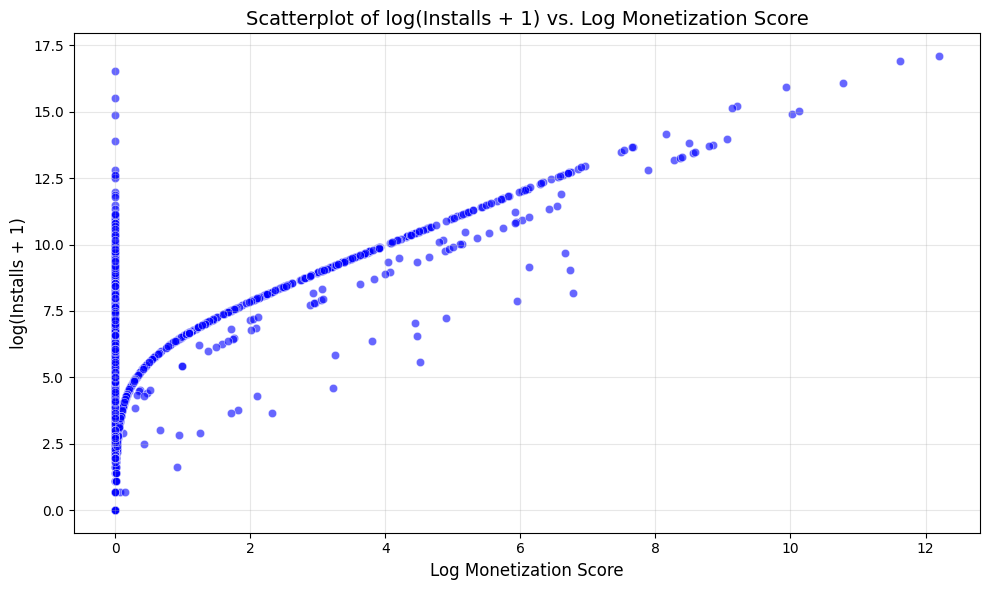

In [65]:

data['Log Monetization Score'] = np.log1p(data['Monetization Score'])
sample_size = 1000
sampled_data = data.sample(n=min(sample_size, len(data)), random_state=42)

sampled_data['log_installs'] = np.log(sampled_data['Installs'] + 1)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sampled_data,
    x='Log Monetization Score',
    y='log_installs',
    alpha=0.6,
    color='blue'
)

plt.title("Scatterplot of log(Installs + 1) vs. Log Monetization Score", fontsize=14)
plt.xlabel("Log Monetization Score", fontsize=12)
plt.ylabel("log(Installs + 1)", fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [66]:
data["Monetization Score"].describe()

count    2.235275e+06
mean     1.169857e+03
std      5.670919e+04
min      0.000000e+00
25%      0.000000e+00
50%      6.679055e-02
75%      8.205343e+00
max      3.477198e+07
Name: Monetization Score, dtype: float64

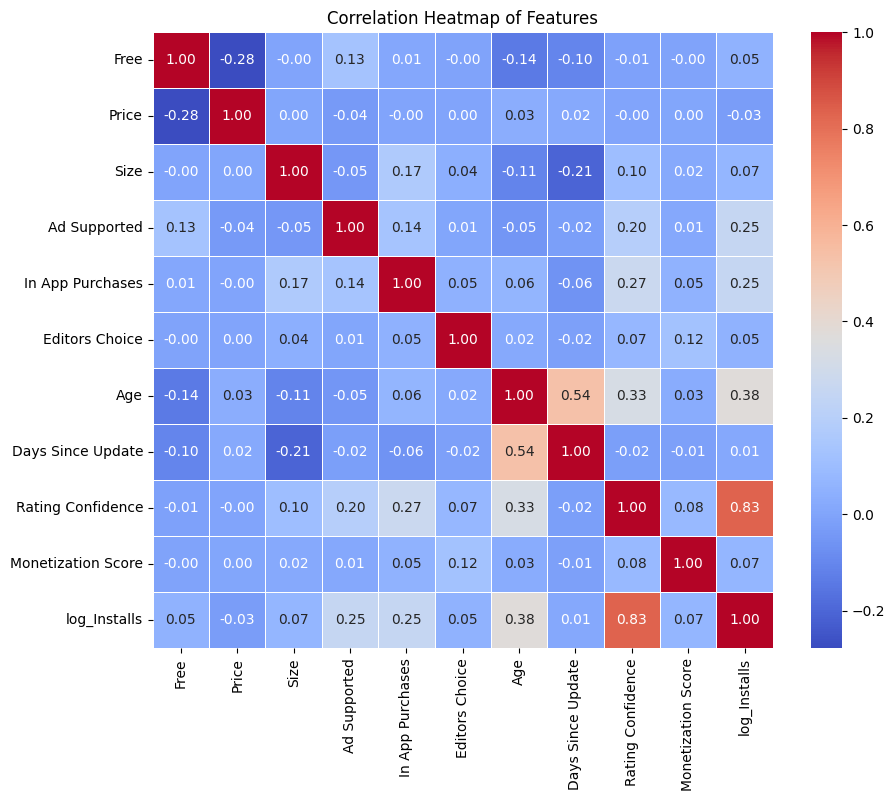

In [67]:

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_columns]
numerical_data=numerical_data.drop(columns=["Installs Category","Installs",
                                            "Log Monetization Score","Rating Count",
                                            "Rating"])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


# Unsupervised 

In [68]:
df=data.copy()

In [69]:
data.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs Category',
       'Installs', 'Free', 'Price', 'Size', 'Minimum Android', 'Developer Id',
       'Released', 'Last Updated', 'Content Rating', 'Ad Supported',
       'In App Purchases', 'Editors Choice', 'Scraped Time', 'Region', 'Year',
       'Age', 'Days Since Update', 'Rating Confidence', 'Season',
       'Monetization Score', 'log_Installs', 'Log Monetization Score'],
      dtype='object')

## Clustering

In [70]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D


In [71]:

label_encoders = {}
categorical_columns = ['Category', 'Content Rating','Region','Year','Season']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [72]:

numeric_columns = [ 'Price', 'Size',
                   'Age', 'Days Since Update', 'Rating Confidence',
                   'Monetization Score']
encoded=['Free','Ad Supported','In App Purchases','Editors Choice']
selected_columns = numeric_columns + categorical_columns+encoded

X = df[selected_columns]

In [73]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
pca_score = pca.explained_variance_ratio_

In [74]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
kmeans_score = kmeans.inertia_
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


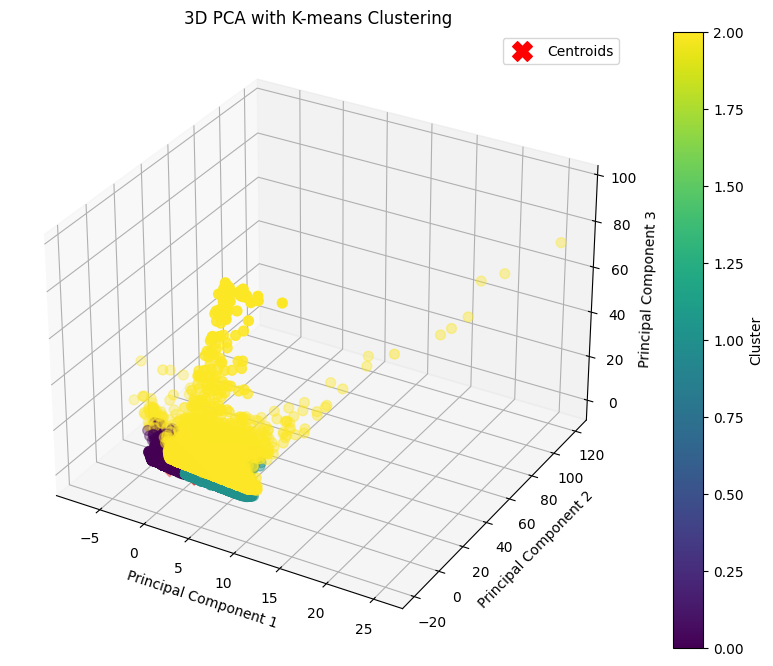

PCA Explained Variance Ratio (3 components): [0.17213944 0.10567813 0.08594112]
K-means Inertia (Cluster Score): 6691512.092449722


In [75]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', s=50)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           c='red', marker='X', s=200, label='Centroids')
ax.set_title('3D PCA with K-means Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()


print(f"PCA Explained Variance Ratio (3 components): {pca_score}")
print(f"K-means Inertia (Cluster Score): {kmeans_score}")

## Outlier Detection 

In [76]:

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Category', 'Content Rating','Region','Year','Season']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


features = [ 'Category',  
       'Installs', 'Free', 'Price', 'Size'
       , 'Content Rating', 'Ad Supported',
       'In App Purchases', 'Editors Choice', 'Region', 'Year',
       'Age', 'Days Since Update', 'Rating Confidence', 'Season',
       'Monetization Score'
       ]

iso_forest = IsolationForest(contamination=0.1, random_state=42)


outlier_predictions = iso_forest.fit_predict(df[features])

df['Isolation Forest Outlier'] = outlier_predictions == -1 

outliers_count = df['Isolation Forest Outlier'].sum()
print(f"\nTotal Outliers Detected: {outliers_count}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Total Outliers Detected: 223528


In [77]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs Category',
       'Installs', 'Free', 'Price', 'Size', 'Minimum Android', 'Developer Id',
       'Released', 'Last Updated', 'Content Rating', 'Ad Supported',
       'In App Purchases', 'Editors Choice', 'Scraped Time', 'Region', 'Year',
       'Age', 'Days Since Update', 'Rating Confidence', 'Season',
       'Monetization Score', 'log_Installs', 'Log Monetization Score',
       'Cluster', 'Isolation Forest Outlier'],
      dtype='object')

In [78]:
data=df[df["Isolation Forest Outlier"]==False]
print(data.shape)
print(data.columns)

(2011747, 29)
Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs Category',
       'Installs', 'Free', 'Price', 'Size', 'Minimum Android', 'Developer Id',
       'Released', 'Last Updated', 'Content Rating', 'Ad Supported',
       'In App Purchases', 'Editors Choice', 'Scraped Time', 'Region', 'Year',
       'Age', 'Days Since Update', 'Rating Confidence', 'Season',
       'Monetization Score', 'log_Installs', 'Log Monetization Score',
       'Cluster', 'Isolation Forest Outlier'],
      dtype='object')


In [79]:
data=data.drop(columns=["Isolation Forest Outlier","Log Monetization Score","log_Installs","Minimum Android"])

In [80]:
Outlier_df=df[df["Isolation Forest Outlier"]==True]

In [81]:
data.head(5)
print(data.shape)

(2011747, 25)


In [82]:
data_original=data.copy()

In [83]:
data.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs Category',
       'Installs', 'Free', 'Price', 'Size', 'Developer Id', 'Released',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Scraped Time', 'Region', 'Year', 'Age',
       'Days Since Update', 'Rating Confidence', 'Season',
       'Monetization Score', 'Cluster'],
      dtype='object')

# Training Neural Nets

In [84]:
data["Installs"].describe()

count    2.011747e+06
mean     1.888403e+04
std      1.041700e+05
min      0.000000e+00
25%      7.400000e+01
50%      5.410000e+02
75%      4.657000e+03
max      1.921115e+07
Name: Installs, dtype: float64

## Training Without Outliers 

In [85]:
data=data_original.copy()

In [87]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib


data['Installs'] = np.log1p(data['Installs'])

X = data.drop(columns=['App Name', 'Installs Category','Developer Id'  ,'Released', 
                       'Last Updated', 'Scraped Time', 'Rating','Rating Count', 
                       'Installs'])
y = data['Installs']


# Scaling
numerical_columns = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Train-Test Split
X_test2 = X.loc[15222:440000, :]
y_test2 = y.loc[15222:440000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_with_early_stopping = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=32, callbacks=[early_stopping])

# Saving the Model and Preprocessing Objects
model.save('my_model.h5')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
print("Model and preprocessing objects saved successfully.")

# Model Evaluation on Validation Set
y_hat_validation = model.predict(X_test)
mse_validation = mean_squared_error(y_test, y_hat_validation)
rmse_validation = np.sqrt(mse_validation)
r_squared_validation = r2_score(y_test, y_hat_validation)
mae_validation = mean_absolute_error(y_test, y_hat_validation)

print("Validation results with early stopping:")
print(f"R Squared  : {r_squared_validation}")
print(f"Mean Squared Error: {mse_validation}")
print(f"Root Mean Squared Error: {rmse_validation}")
print(f"Mean Absolute Error: {mae_validation}")

# Evaluation on Unseen Test Data (X_test2)
y_hat_unseen = model.predict(X_test2)
mse_unseen = mean_squared_error(y_test2, y_hat_unseen)
rmse_unseen = np.sqrt(mse_unseen)
r_squared_unseen = r2_score(y_test2, y_hat_unseen)
mae_unseen = mean_absolute_error(y_test2, y_hat_unseen)

print("Evaluation results on unseen test data:")
print(f"R Squared  : {r_squared_unseen}")
print(f"Mean Squared Error: {mse_unseen}")
print(f"Root Mean Squared Error: {rmse_unseen}")
print(f"Mean Absolute Error: {mae_unseen}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,497 (41.00 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
40235/40235 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 2.5353 - mse: 2.5353 - val_loss: 1.4692 - val_mse: 1.4692
Epoch 2/25
40235/40235 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 1.5518 - mse: 1.5518 - val_loss: 1.4253 - val_mse: 1.4253
Epoch 3/25
40235/40235 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - loss: 1.5133 - mse: 1.5133 - val_loss: 1.3987 - val_mse: 1.3987
Epoch 4/25
40235/40235 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 1.4764 - mse: 1.4764 - val_loss: 1.4055 - val_mse: 1.4055
Epoch 5/25
40235/40235 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 1.4518 - mse: 1.4518 - val_loss: 1.4418 - val_mse: 1.4418
Epoch 6/25
40235/40235 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 1.4439 - mse: 1.4439 - val_loss: 1.3894 - val_mse: 1.3894
Epoch 7/25
40235/40235 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 1.4195 - mse: 1.4195 - val_loss: 1.5227 - val_mse: 1.5227
Epoch 8/25
40235/40235 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 1.4109 - mse: 1.4109 - val_loss: 1.3992 - val_mse: 1.3992
Epoch 9/25
40235